In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
print("Filas y columnas:", df.shape)
print(df.info())

Filas y columnas: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
# ver valores nulos
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
#ver cuantos valores únicos Hay por columna
print(df.nunique())

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


In [10]:
# conteo de registros por género
print(df['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


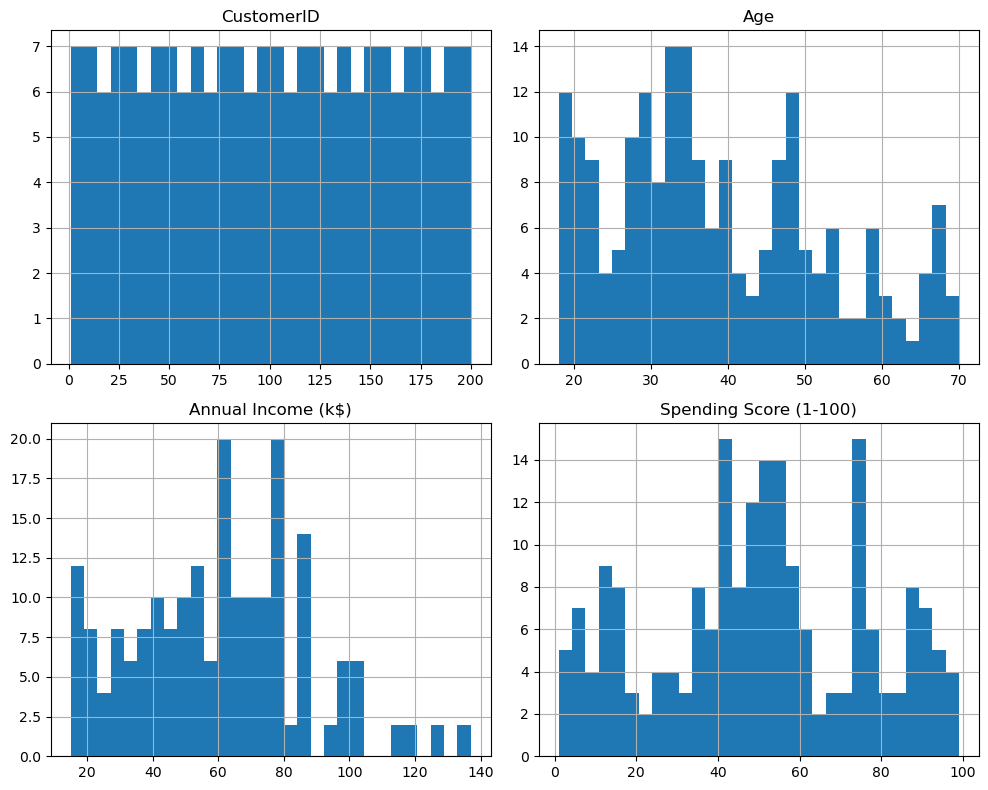

In [11]:
# Graficas Histogramas
df.hist(bins=30,figsize=(10,8))
plt.tight_layout()
plt.show()

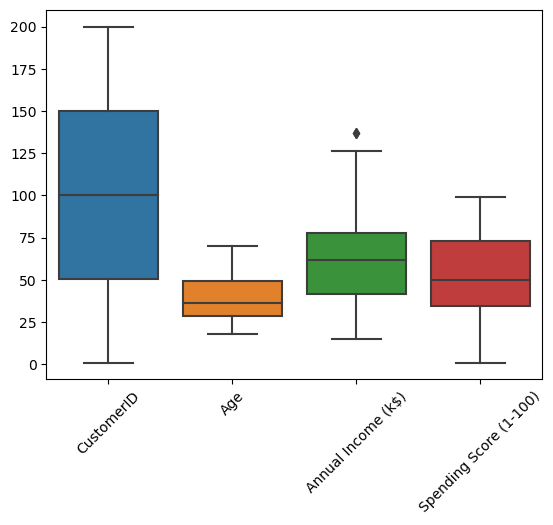

In [12]:
#Grafica bloxplots para detectar valores atípicos
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.show()

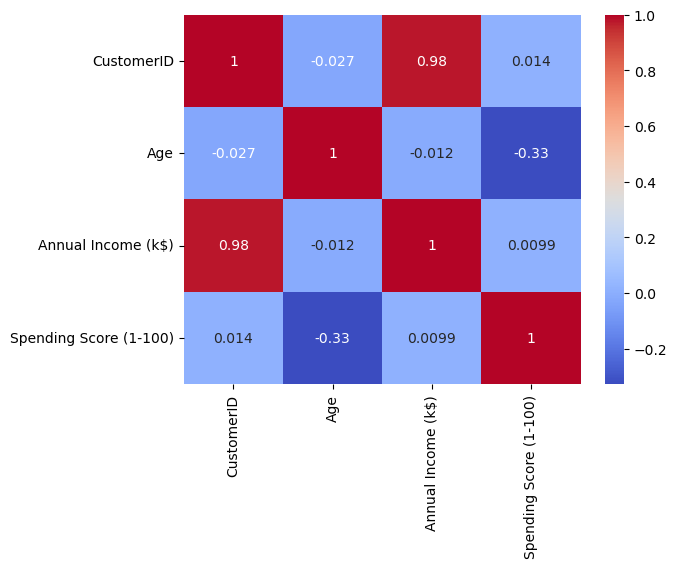

In [18]:
# Graficar un mapa de correlación entree variables numéricas
numericas=df.select_dtypes(include=[np.number])
sns.heatmap(numericas.corr(), annot=True,cmap='coolwarm')
plt.show()

In [17]:
import pandas as pd

# Cargar el archivo
df = pd.read_csv('Mall_Customers.csv')

# Ver las primeras filas para confirmar que se cargó
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [18]:
# Seleccionar las características relevantes
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Verificar que se seleccionaron bien
print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [19]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para guardar las inercias
inertias = []

# Probar valores de k del 1 al 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

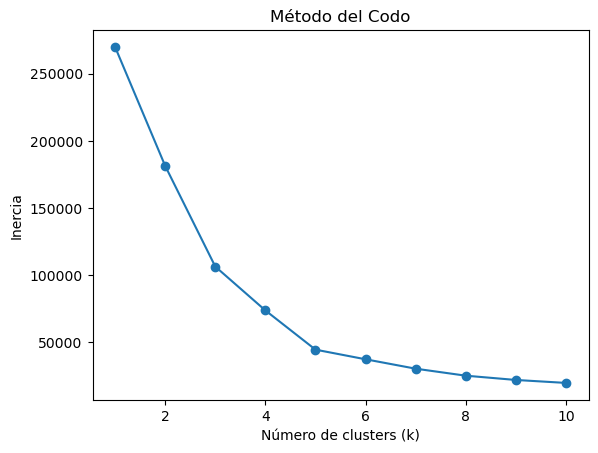

In [20]:
# Graficar el método del codo
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Entrenar con k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Calcular métricas
silhouette = silhouette_score(X, y_kmeans)
calinski = calinski_harabasz_score(X, y_kmeans)
davies = davies_bouldin_score(X, y_kmeans)

# Mostrar resultados
print(f"Coeficiente de Silhouette: {silhouette:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski:.3f}")
print(f"Índice de Davies-Bouldin: {davies:.3f}")

Coeficiente de Silhouette: 0.554
Índice de Calinski-Harabasz: 247.359
Índice de Davies-Bouldin: 0.573


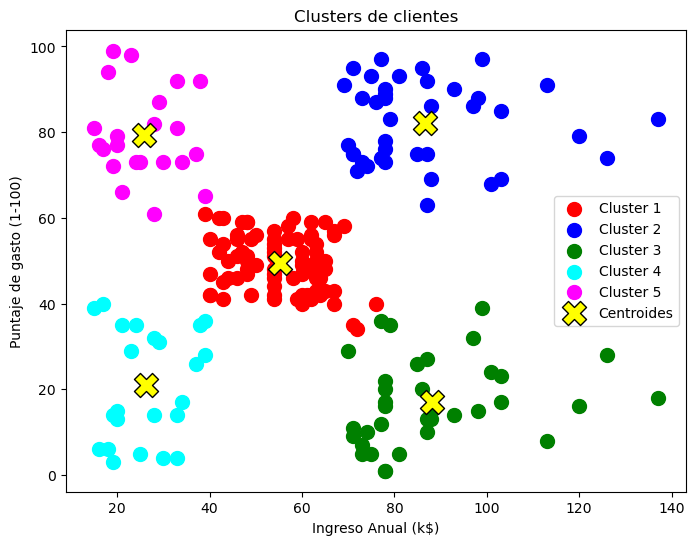

In [23]:
import matplotlib.pyplot as plt

# Entrenar modelo
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Gráfica de clusters
plt.figure(figsize=(8, 6))

plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroides', edgecolor='black', marker='X')

plt.title('Clusters de clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.legend()
plt.show()